# Decision Trees for classifying mushrooms

Implementing a decision tree from scratch and applying it to the task of classifying whether a mushroom is edible or poisonous(based on it's physical attributes).

## steps followed by code:

- 1- Dataset --> One hot encoded dataset
- 2- Decision Tree Refresher
  - Calculate entropy
  - Split dataset
  - Calculate information gain
  - Get best split
- 3- Building the tree


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from public_tests_tree import *
from utils_tree import *

%matplotlib inline

### 1- Dataset:

-  There are 10 examples of mushrooms in this dataset. For each example, there are:
    - **Three features**
        - Cap Color (Brown or Red),
        - Stalk Shape (Tapering (as in \ /  ) or Enlarging (as in /\ ), and
        - Solitary (Yes or No)
    - **Label**
        - Edible (1 indicating yes or 0 indicating poisonous)
        
#### One hot encoded dataset:

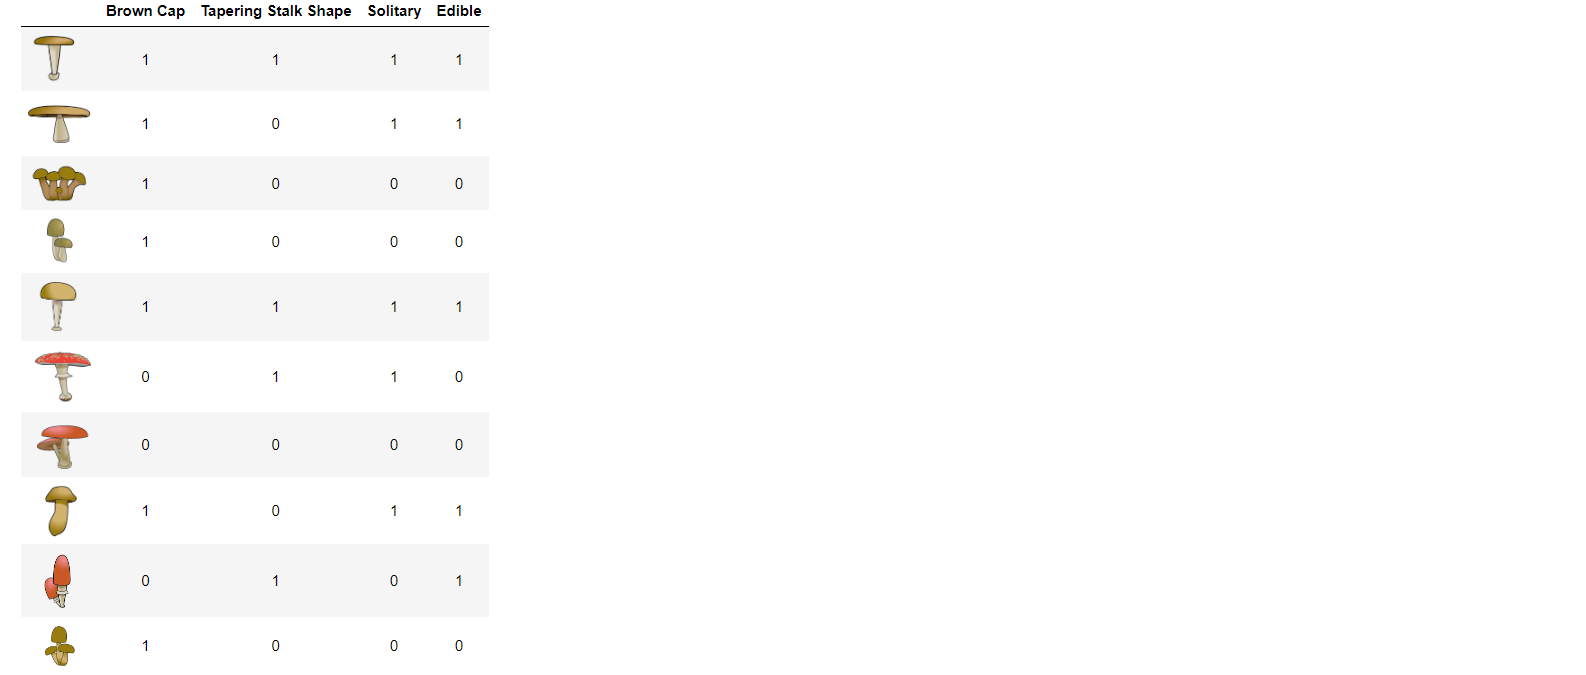
        
- **X_train** contains three features for each example 
    - Brown Color (A value of **1** indicates "Brown" cap color and **0** indicates "Red" cap color)
    - Tapering Shape (A value of **1** indicates "Tapering Stalk Shape" and **0** indicates "Enlarging" stalk shape)
    - Solitary  (A value of **1** indicates "Yes" and **0** indicates "No")

- **y_train** is whether the mushroom is edible 
    - **y = 1** indicates edible
    - **y = 0** indicates poisonous
    


In [2]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

The code below prints the first few elements of X_train and the type of the variable:

In [3]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


The code below prints the first few elements of Y_train and the type of the variable:

In [4]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables:

In [5]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


### 2 - Decision Tree Refresher:

Building a decision tree based on the dataset provided,

- **The steps for building a decision tree are as follows:**
    - Starting with all examples at the root node
    - Calculating information gain for splitting on all possible features, and picking the one with the highest information gain
    - Splitting dataset according to the selected feature, and creating left and right branches of the tree
    - Keeping the repeating splitting process until stopping criteria is met
  
  
- The following functions will be implemented, which splitting a node into left and right branches using the feature with the highest information gain
    - Calculate the entropy at a node 
    - Split the dataset at a node into left and right branches based on a given feature
    - Calculate the information gain from splitting on a given feature
    - Choose the feature that maximizes information gain


#### Calculate entropy:

compute_entropy computes the entropy (measure of impurity) at a node. 
- The function takes in a numpy array (y) that indicates whether the examples in that node are edible **1** or poisonous **0**
* Compute $p_1$, which is the fraction of examples that are edible 
* The entropy is then calculated as 

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$


In [6]:
def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    
    entropy = 0.
    
    if len(y) != 0 :
        p1 = len(y[y==1]) / len(y)
        
        if p1!=0 and p1!=1:
            entropy = -p1 * np.log2(p1) - (1-p1)* np.log2(1-p1)
        else:
            entropy = 0
             
    
    return entropy

In [7]:
# Compute entropy at the root node
# Since there are 5 edible and 5 non-edible mushrooms, the entropy should be 1"

print("Entropy at root node: ", compute_entropy(y_train)) 

# UNIT TESTS
compute_entropy_test(compute_entropy)

Entropy at root node:  1.0
 All tests passed. 


#### Split dataset:
- For each index in **node_indices**
    - If the value of X at that index for that feature is **1**, add the index to **left_indices**
    - If the value of X at that index for that feature is **0**, add the index to **right_indices**

In [8]:
def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    
    left_indices = []
    right_indices = []
    
    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
        
    return left_indices, right_indices

CASE 1:
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]
CASE 2:
Left indices:  [0, 2, 4]
Right indices:  [6, 8]


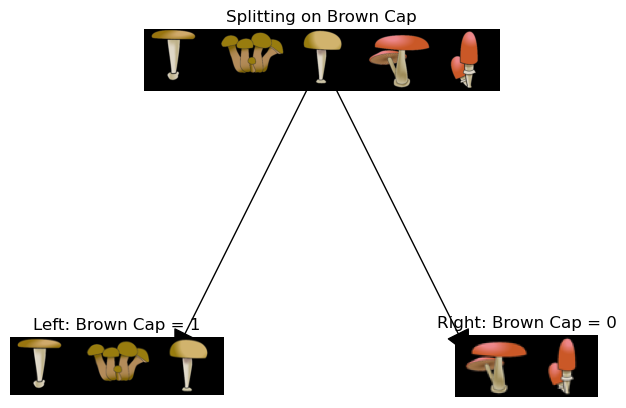

 All tests passed.


In [10]:
# Case 1

root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("CASE 1:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)


# Case 2

root_indices_subset = [0, 2, 4, 6, 8]
left_indices, right_indices = split_dataset(X_train, root_indices_subset, feature)

print("CASE 2:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# Visualize the split 
generate_split_viz(root_indices_subset, left_indices, right_indices, feature)

# UNIT TESTS    
split_dataset_test(split_dataset)



####  Calculate information gain:

information_gain function takes in the training data, the indices at a node and a feature to split on and returns the information gain from the split.


$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

where 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch, respectively



- compute_entropy() function  -> to calculate the entropy
- split_dataset() function --> to split the dataset 

In [11]:
def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
   
    Returns:
        cost (float):        Cost computed
    
    """    
    # Splitting dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
   
    information_gain = 0
    

    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)
    
    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)
    
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    information_gain = node_entropy - weighted_entropy
    
    
    
    return information_gain

In [12]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)

# UNIT TESTS
compute_information_gain_test(compute_information_gain)

Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
 All tests passed.


####  Get best split:
get_best_split() function gets the best feature to split on by computing the information gain from each featuren and returning the feature that gives the maximum information gain.

- The function takes in the training data, along with the indices of datapoint at that node
- The output of the function is the feature that gives the maximum information gain 
    - using compute_information_gain() function to iterate through the features and calculate the information for each feature


In [13]:
def get_best_split(X, y, node_indices):   
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """    

    num_features = X.shape[1]
    
    best_feature = -1
   
    max_info_gain = 0
    
    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)
        
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature
          
   
    return best_feature

In [14]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

# UNIT TESTS
get_best_split_test(get_best_split)

Best feature to split on: 2
 All tests passed.


So, due to results of codes were written above, the function returns that **the best feature to split on at the root node is feature 2 ("Solitary")**

### 3 - Building the tree:

Generating a decision tree by successively picking the best feature to split on until reaching the stopping criteria (maximum depth is 2).

In [15]:
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
   
    """ 

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Getting the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. 
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


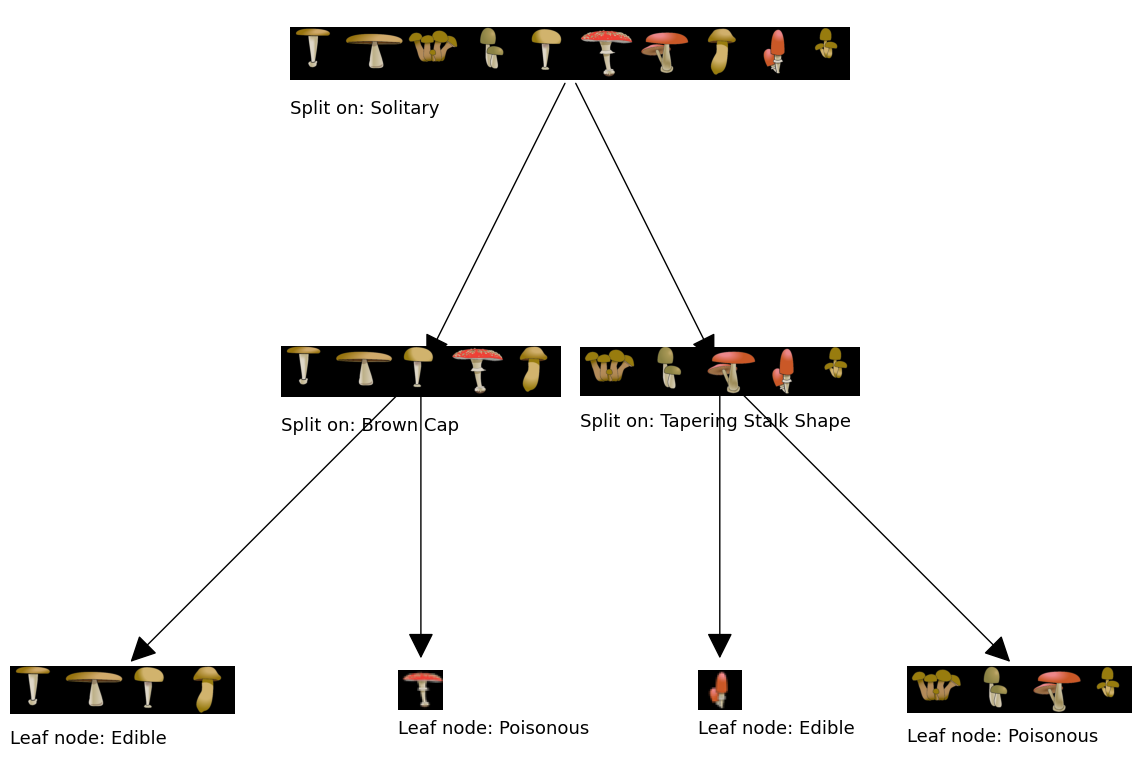

In [16]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)
generate_tree_viz(root_indices, y_train, tree)